In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("processed_car_prices.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [6]:
df = df.drop("Unnamed: 0",axis=1)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
X = df[['highway-mpg']]
Y = df['price']

In [20]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [22]:
lm.intercept_

38423.305858157386

In [23]:
lm.coef_

array([-821.73337832])

# Lets now try the multivalued Regression

In [24]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [25]:
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
lm.intercept_

-15811.863767729232

In [27]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

In [28]:
%matplotlib inline

In [29]:
import seaborn as sns

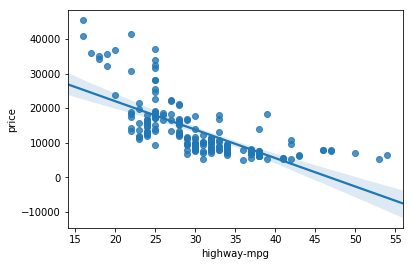

In [30]:
sns.regplot(x="highway-mpg",y="price",data=df)

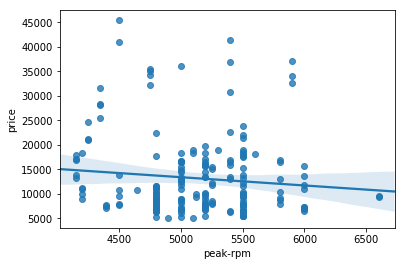

In [31]:
sns.regplot(x="peak-rpm",y="price",data=df)

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

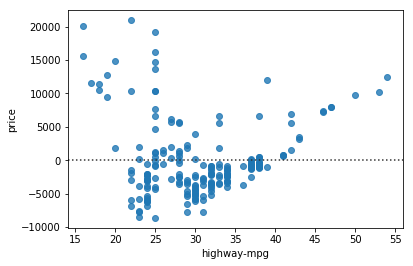

In [35]:
sns.residplot(df['highway-mpg'],df['price'])

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First lets make a prediction


In [40]:
Ypred = lm.predict(Z)
Ypred

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021, 10722.47987021, 17804.67839001,
       18063.62127923, 19320.4783358 , 26969.32926712, 27675.53714681,
       28191.72492822,   651.8979531 ,  5649.14852473,  5813.93036332,
        5479.18538861,  5370.70721111,  8739.99146436,  5799.13999145,
        5902.71714714,  5902.71714714,  9036.59877384, 11863.05285278,
       18768.17719927,  4809.56824779,  5693.61564163,  4006.84810707,
        6118.6524279 ,  6193.98126841,  6448.2161051 ,  6514.12884053,
        9478.60926656,  9728.13605072,  9798.75683869, 10118.90441082,
       11178.90975501, 10424.07266905,  9462.75597759, 12626.31797001,
       34469.72884008, 34469.72884008, 43997.74598077,  5265.01699909,
        5565.21327191,  5588.75353457,  5777.07563582,  5800.61589848,
        7337.41632504,  7337.41632504,  7360.95658769, 10537.5383843 ,
      

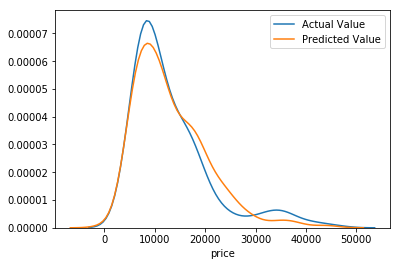

In [64]:
sns.distplot(df['price'],hist=False,label='Actual Value')
sns.distplot(Ypred,hist=False,label='Predicted Value')

In [111]:
x = df['highway-mpg']
y = df['price']
x.describe()

count    201.000000
mean      30.686567
std        6.815150
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64

In [112]:
pf = np.polyfit(x,y,3)
print(pf)

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]


In [113]:
f = np.poly1d(pf)
print(f)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


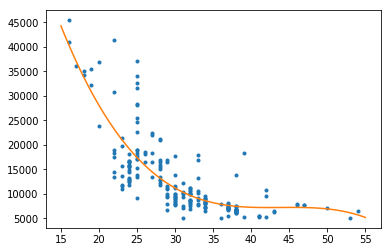

In [114]:
x_new = np.linspace(15, 55, 95)
y_new = f(x_new)
plt.plot(x,y,'.',)
plt.plot(x_new,y_new,'-')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

<pre>𝑌ℎ𝑎𝑡=𝑎 + 𝑏1𝑋1 + 𝑏2𝑋2 + 𝑏3𝑋1𝑋2 + 𝑏4𝑋21 + 𝑏5𝑋22</pre>

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
pr = PolynomialFeatures(2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [123]:
Z_pr = pr.fit_transform(Z)
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [125]:
Z.shape, Z_pr.shape

((201, 4), (201, 15))

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [129]:
inp = [('scale',StandardScaler()),('poly',PolynomialFeatures()),('model',LinearRegression())]

In [130]:
pipe = Pipeline(inp)

In [131]:
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [132]:
pipe.fit(Z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [135]:
pipe.predict(Z)[:5]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955,
       16135.53737535])

R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [142]:
X.head()

,highway-mpg
0,27
1,27
2,26
3,30
4,22


In [143]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [144]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
lm.score(X,Y)

0.4965911884339175

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model.

In [146]:
Ypred = lm.predict(X)

In [147]:
from sklearn.metrics import mean_squared_error

In [148]:
mean_squared_error(Y,Ypred)

31635042.944639895

This is for linear Regression model. Let's check for Multiple Linear Regression model.

In [151]:
lm.fit(Z,Y)
lm.score(Z,Y)

0.8093732522175299

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [154]:
mean_squared_error(lm.predict(Z),Y)

11979300.34981888

In [155]:
from sklearn.metrics import r2_score

In [160]:
r2_score(y,f(x))

0.674194666390652

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [161]:
mean_squared_error(y,f(x))

20474146.426361218

Time for visualization:

In [162]:
%matplotlib inline

In [163]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
new_input.shape

(99, 1)

In [164]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
yhat = lm.predict(new_input)

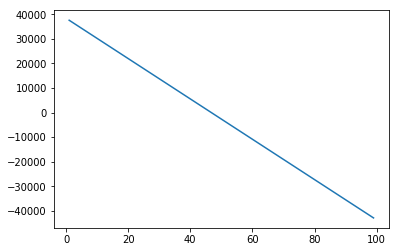

In [171]:
plt.plot(new_input,yhat)
plt.show()

When comparing models, the model with the higher R-squared value is a better fit for the data. 

When comparing models, the model with the smallest MSE value is a better fit for the data.

We compared three models:
    1. Simple Linear Regression
    2. Multiple Linear Regression
    3. Polynomial Fit
Comparing these three models, we conclude that the MLR model is the best model to be a
ble to predict price from our dataset. This result makes sense, since we have 27 variables
in total, and we know that more than one of those variables are potential predictors 
of the final car price.